For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x=np.linspace(0,20)
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
y= -1 * x + 2
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot your data points. 

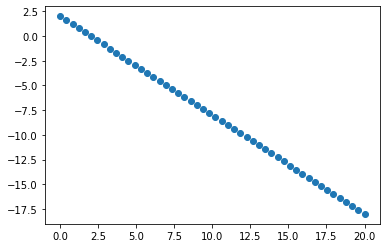

In [4]:
plt.scatter(x,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [5]:


def Predict_y(theta0,theta1):
    return theta0+theta1*x


def CostFunc(predictedY):
    return 0.5 * (1/m) * (np.sum((predictedY- y)**2))

def GradientTheta(predictedY):
    grad_theta0=(1/m) * np.sum(predictedY - y)
    grad_theta1=(1/m) * np.sum((predictedY - y) * x)
    return grad_theta0, grad_theta1


    
def UpdateThetas(theta0,theta1,predictedY):
    Grad_Of_Theta0,Grad_Of_Theta1=GradientTheta(predictedY)
    Grad_Vec = np.array([Grad_Of_Theta0,Grad_Of_Theta0])
    theta_0update=theta0 - L_R * Grad_Of_Theta0
    theta_1update=theta1 - L_R * Grad_Of_Theta1
    return Grad_Vec, theta_0update, theta_1update



#Gradient_Descent
def FindBestThetas(x,y,L_R,Max_iterations):
    
    theta0=0
    theta1=0
    theta0List=[]
    theta1List=[]
    
    predictedYList=[]
    CostFunList=[]
    iterations=0
  
    while (iterations < Max_iterations) :
            
            if iterations > 1:
                if np.linalg.norm(grad_vec)< 10**-4:
                    print("Grad condition stopped the iterations")
                    break
                elif abs(CostFunList[iterations-1]- CostFunList[iterations-2])< 10**-6:
                    print("cost condition stoppped the iterations")
                    break
            
        
            theta0List.append(theta0)
            theta1List.append(theta1)
            
            predictedY= Predict_y(theta0,theta1)
            predictedYList.append(predictedY)
            
            Jcost1=CostFunc(predictedY)
            CostFunList.append(Jcost1)
            
            grad_vec, theta0,theta1=  UpdateThetas(theta0,theta1,predictedY)
            
        
            iterations+=1
            
            
    return theta0List,theta1List,CostFunList,predictedYList,theta0,theta1,iterations
        



In [6]:

L_R=0.001
m=len(y)

Max_iterations=5000

Theta0_List,Theta1_List,Cost_List,predictedY_List,BestTheta0,BestTheta1,iterationsDone= FindBestThetas(x,y,L_R,Max_iterations)
BestYPredicted= Predict_y(BestTheta0,BestTheta1)
print("BestTheta1:",BestTheta1)
print("BestTheta0:",BestTheta0)
print(iterationsDone)

BestTheta1: -0.9573760568534111
BestTheta0: 1.426973441821931
5000


In [7]:
from sklearn.metrics import r2_score

r2_score(y,BestYPredicted)

0.9975621544307232

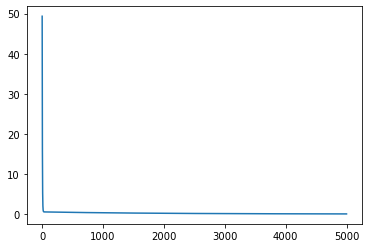

In [8]:
plt.plot(range(0,iterationsDone),Cost_List)
plt.show()


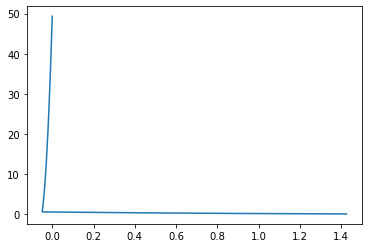

In [9]:
plt.plot(Theta0_List,Cost_List)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

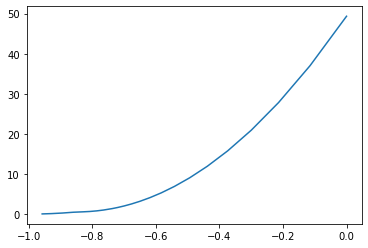

In [10]:
plt.plot(Theta1_List,Cost_List)
plt.show

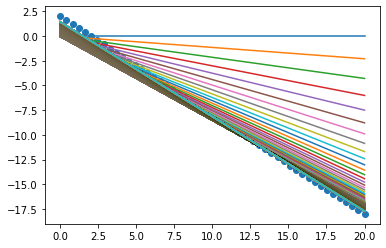

In [11]:
plt.scatter(x,y)
for h in predictedY_List:
    
    plt.plot(x,h)


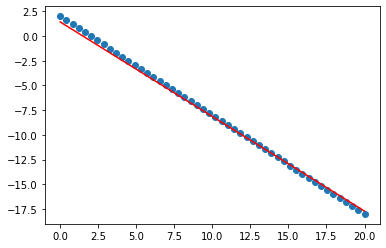

In [12]:
plt.scatter(x,y)
plt.plot(x,BestYPredicted,'r')
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

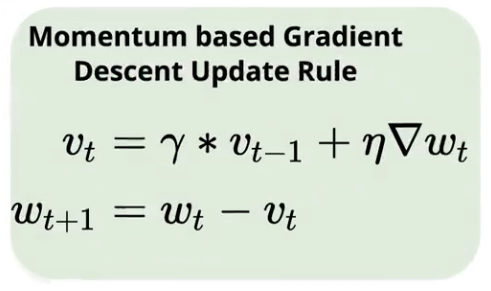

#### γ takes values between 0 and 1.
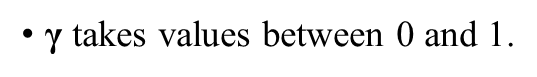

In [13]:
def Predict_y(theta0,theta1):
    return theta0+theta1*x


def CostFunc(predictedY):
    return 0.5 * (1/m) * (np.sum((predictedY- y)**2))

#return Grad_Theta0,Grad_Theta1
def GradientTheta(predictedY):
    grad_theta0=(1/m) * np.sum(predictedY - y)
    grad_theta1=(1/m) * np.sum((predictedY - y) * x)
    return grad_theta0, grad_theta1


    
def UpdateThetas(theta0,theta1,predictedY,Vt_theta0,Vt_theta1):
    Grad_Of_Theta0,Grad_Of_Theta1=GradientTheta(predictedY)
    Grad_Vec = np.array([Grad_Of_Theta0,Grad_Of_Theta0])
    
    Vt_theta0= gama*Vt_theta0 + L_R* Grad_Of_Theta0
    
    Vt_theta1= gama*Vt_theta1 + L_R* Grad_Of_Theta1
    
    theta_0update=theta0 - Vt_theta0
    theta_1update=theta1 - Vt_theta1
    return Grad_Vec, theta_0update, theta_1update,Vt_theta0,Vt_theta1



#Gradient_Descent
def FindBestThetas(x,y,L_r,Gama,Max_iterations):
    L_R=L_r
    gama=Gama
    
    
    theta0=0
    theta1=0
    theta0List=[]
    theta1List=[]
    
    predictedYList=[]
    CostFunList=[]
    iterations=0
    Vt_theta0=0
    Vt_theta1=0
  
    while (iterations < Max_iterations) :
            
            if iterations > 1:
                if np.linalg.norm(grad_vec)< 10**-3:
                    print("Grad condition stopped the iterations")
                    break
                elif abs(CostFunList[iterations-1]- CostFunList[iterations-2])< 10**-5:
                    print("cost condition stoppped the iterations")
                    break
            
        
            theta0List.append(theta0)
            theta1List.append(theta1)
            
            predictedY= Predict_y(theta0,theta1)
            predictedYList.append(predictedY)
            
            Jcost1=CostFunc(predictedY)
            CostFunList.append(Jcost1)
            
            grad_vec, theta0,theta1,Vt_theta0,Vt_theta1 = UpdateThetas(theta0,theta1,predictedY,Vt_theta0,Vt_theta1)
            
            
            
            iterations+=1
            
            
    return theta0List,theta1List,CostFunList,predictedYList,theta0,theta1,iterations
        


In [14]:

#Learning_Rate
L_R=0.001
m=len(y)
gama=0.9

Max_iterations=600

Theta0_List,Theta1_List,Cost_List,predictedY_List,BestTheta0,BestTheta1,iterationsDone= FindBestThetas(x,y,L_R,gama,Max_iterations)
BestYPredicted= Predict_y(BestTheta0,BestTheta1)
print("BestTheta1:",BestTheta1)
print("BestTheta0:",BestTheta0)
print(iterationsDone)

BestTheta1: -0.9674852709622932
BestTheta0: 1.5628794077900316
600


In [15]:
from sklearn.metrics import r2_score

r2_score(y,BestYPredicted)

0.9985814023980488

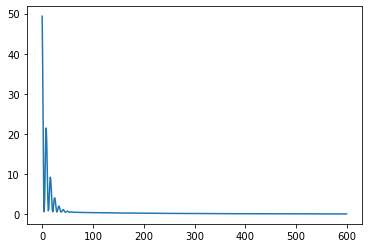

In [16]:
plt.plot(range(0,iterationsDone),Cost_List)
plt.show()


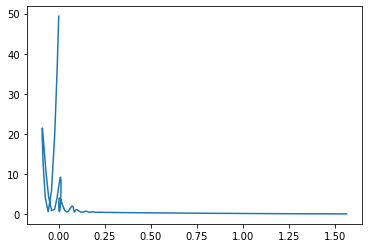

In [17]:
plt.plot(Theta0_List,Cost_List)
plt.show()

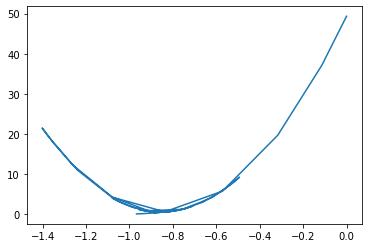

In [18]:
plt.plot(Theta1_List,Cost_List)
plt.show()

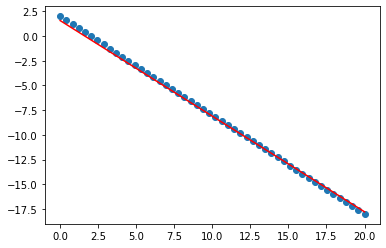

In [19]:
plt.scatter(x,y)
plt.plot(x,BestYPredicted,'r')
plt.show()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [20]:

L_R=0.001
m=len(y)
gama=0.4

Max_iterations=5000

Theta0_List,Theta1_List,Cost_List,predictedY_List,BestTheta0,BestTheta1,iterationsDone= FindBestThetas(x,y,L_R,gama,Max_iterations)
BestYPredicted= Predict_y(BestTheta0,BestTheta1)
print("BestTheta1:",BestTheta1)
print("BestTheta0:",BestTheta0)
print(iterationsDone)

cost condition stoppped the iterations
BestTheta1: -0.9775931009596364
BestTheta0: 1.6987667660782664
4505


In [21]:
from sklearn.metrics import r2_score

r2_score(y,BestYPredicted)

0.9993263063439783

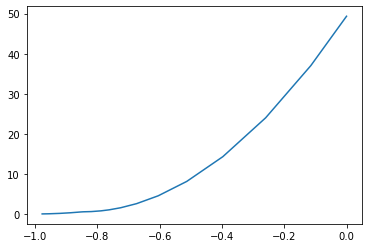

In [22]:
plt.plot(Theta1_List,Cost_List)
plt.show()


### Update your Batch GD for one variable  implementation to be NAG and check your results

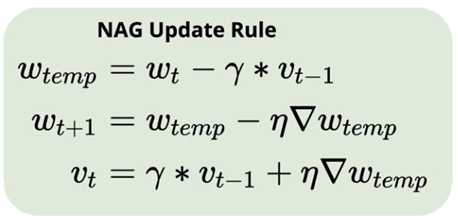

In [23]:
def Predict_y(theta0,theta1):
    return theta0+theta1*x


def CostFunc(predictedY):
    return 0.5 * (1/m) * (np.sum((predictedY- y)**2))

#return Grad_Theta0,Grad_Theta1
def GradientThetas(predictedY):
    grad_theta0=(1/m) * np.sum(predictedY - y)
    grad_theta1=(1/m) * np.sum((predictedY - y) * x)
    return grad_theta0, grad_theta1


    
def UpdateThetas(theta0,theta1,predictedY,Vt_theta0,Vt_theta1):
    Grad_Of_Theta0,Grad_Of_Theta1=GradientThetas(predictedY)
    Grad_Vec = np.array([Grad_Of_Theta0,Grad_Of_Theta0])
    
    theta_temp_0= theta0 - gama * Vt_theta0
    theta_temp_1= theta1 - gama * Vt_theta1
    
    
    predictedY_temp= Predict_y(theta_temp_0, theta_temp_1)
    Grad_Theta0_temp,Grad_Theta1_temp=GradientThetas(predictedY_temp)
    
    theta_0update=theta_temp_0 - L_R * Grad_Theta0_temp
    theta_1update=theta_temp_1 - L_R * Grad_Theta1_temp
    
    
    Vt_theta0= gama*Vt_theta0 + L_R*Grad_Theta0_temp
    Vt_theta1= gama*Vt_theta1 + L_R*Grad_Theta1_temp
    
    return Grad_Vec, theta_0update, theta_1update,Vt_theta0,Vt_theta1

#algorithm
def FindBestThetas_NAG(x,y,L_r,Gama,Max_iterations):
    L_R=L_r
    gama=Gama
    
    
    theta0=0
    theta1=0
    theta0List=[]
    theta1List=[]
    
    predictedYList=[]
    CostFunList=[]
    iterations=0
    Vt_theta0=0
    Vt_theta1=0
  
    while (iterations < Max_iterations) :
            
            if iterations > 1:
                if np.linalg.norm(grad_vec)< 10**-2:
                    print("Grad condition stopped the iterations")
                    break
                elif abs(CostFunList[iterations-1]- CostFunList[iterations-2])< 10**-4:
                    print("cost condition stoppped the iterations")
                    break
            
        
            theta0List.append(theta0)
            theta1List.append(theta1)
            
            predictedY= Predict_y(theta0,theta1)
            predictedYList.append(predictedY)
            
            Jcost1=CostFunc(predictedY)
            CostFunList.append(Jcost1)
            
            grad_vec,theta0,theta1,Vt_theta0,Vt_theta1 = UpdateThetas(theta0,theta1,predictedY,Vt_theta0,Vt_theta1)
            
            
            
            iterations+=1
            
            
    return theta0List,theta1List,CostFunList,predictedYList,theta0,theta1,iterations
        


In [24]:
L_R=0.01
m=len(y)
gama=0.9

Max_iterations=600

Theta0_List,Theta1_List,Cost_List,predictedY_List,BestTheta0,BestTheta1,iterationsDone= FindBestThetas_NAG(x,y,L_R,gama,Max_iterations)
BestYPredicted= Predict_y(BestTheta0,BestTheta1)
print("BestTheta1:",BestTheta1)
print("BestTheta0:",BestTheta0)
print(iterationsDone)

BestTheta1: -0.9872379763748756
BestTheta0: 2.000949288687428
600


In [137]:
from sklearn.metrics import r2_score

r2_score(y,BestYPredicted)

0.99936067427393

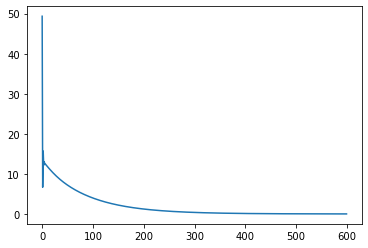

In [138]:
plt.plot(range(0,iterationsDone),Cost_List)
plt.show()

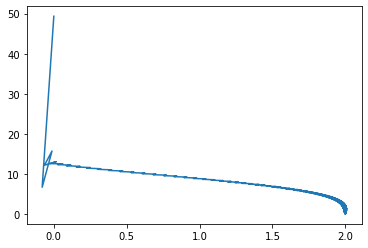

In [139]:
plt.plot(Theta0_List,Cost_List)
plt.show()

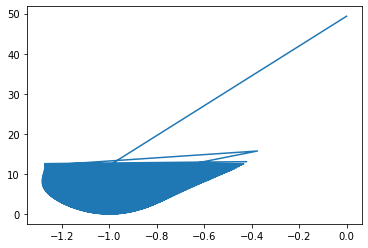

In [140]:
plt.plot(Theta1_List,Cost_List)
plt.show()

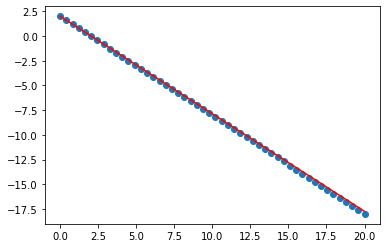

In [141]:
plt.scatter(x,y)
plt.plot(x,BestYPredicted,'r')
plt.show()